In [113]:
import networkx as nx
import matplotlib.pylab as pylab

In [114]:
# all pairs shortest path
def dist(G):
    n = float(nx.number_of_nodes(G))
    sp = nx.shortest_path_length(G)
    distances = []
    
    for node in sp:
        lengths = node[1]
        for target in lengths:
            distances.append(lengths[target])
        
    diameter = max(distances)
    avg_dist = sum(distances) / (n * (n - 1))
    return distances, diameter, avg_dist


# degrees
def deg(G):
    n = float(nx.number_of_nodes(G))
    ndegrees = nx.degree(G)
    for node in ndegrees:
        print(node[1])
    degrees = [ndegrees[node][1] for node in ndegrees]
    mdegree = max(degrees)
    avg_degree = sum(degrees) / n
    return degrees, mdegree, avg_degree


# clustering
def cc(G):
    n = float(nx.number_of_nodes(G))
    clustering = nx.clustering(G)
    ccs = [clustering[node] for node in clustering]
    avg_cc = sum(ccs) / n
    return ccs, avg_cc

In [115]:
# drawing the full network
def draw_network(G, title):
    n = nx.number_of_nodes(G)
    m = nx.number_of_edges(G)
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos=pos, node_size=20, font_size=10, with_labels=False)
    pylab.title(title + " $n=%d, m=%d$"%(n, m))
    pylab.xticks([])
    pylab.yticks([])


# drawing the distance histogram
def dist_hist(distances, diameter, avg_dist):
    pylab.hist(distances, bins=diameter, normed=True, align='right')
    pylab.xlabel("$\ell$")
    pylab.ylabel("$p(\ell)$")
    pylab.title("Distribution of distances: $\overline{\ell}=%f, \ell_{max}=%d$"%(avg_dist, diameter))


# drawing the degree histogram
def deg_hist(degrees, mdegree, avg_degree):
    pylab.hist(degrees, bins=mdegree, normed=True, align='right')
    pylab.xlabel("$k$")
    pylab.ylabel("$p(k)$")
    pylab.title("Degree distribution: $\overline{k}=%f$"%avg_degree)


# drawing the clustering coefficient histogram
def cc_hist(ccs, avg_cc):
    pylab.hist(ccs, bins=10)
    pylab.xlabel("$c$")
    pylab.ylabel("$f(c)$")
    pylab.xticks([x / 10.0 for x in range(11)])
    pylab.title("CC distribution: $C=%f$"%avg_cc)


def basic_net_stats(G, title):
    fig = pylab.figure(1)
    draw_network(G, title)
    fig.show()

    distances, diameter, avg_dist = dist(G)
    fig = pylab.figure(2)
    dist_hist(distances, diameter, avg_dist)
    fig.show()

    degrees, mdegree, avg_degree = deg(G)
    fig = pylab.figure(3)
    deg_hist(degrees, mdegree, avg_degree)
    fig.show()

    ccs, avg_cc = cc(G)
    fig = pylab.figure(4)
    cc_hist(ccs, avg_cc)
    fig.show()

    pylab.show()

In [116]:
# read the graph (gml format)
def read_network(ifn):
    G = nx.read_gml(ifn, label=True)
    return G


def les_miserables():
    ifn = "lesmis.gml"
    G = read_network(ifn)
    basic_net_stats(G, "Les Miserables")


def random_graph():
    n = 77
    p = 0.08
    G = nx.erdos_renyi_graph(n, p)
    basic_net_stats(G, "Random Graph")

Myriel
Napoleon
MlleBaptistine
MmeMagloire
CountessDeLo
Geborand
Champtercier
Cravatte
Count
OldMan
Labarre
Valjean
Marguerite
MmeDeR
Isabeau
Gervais
Tholomyes
Listolier
Fameuil
Blacheville
Favourite
Dahlia
Zephine
Fantine
MmeThenardier
Thenardier
Cosette
Javert
Fauchelevent
Bamatabois
Perpetue
Simplice
Scaufflaire
Woman1
Judge
Champmathieu
Brevet
Chenildieu
Cochepaille
Pontmercy
Boulatruelle
Eponine
Anzelma
Woman2
MotherInnocent
Gribier
Jondrette
MmeBurgon
Gavroche
Gillenormand
Magnon
MlleGillenormand
MmePontmercy
MlleVaubois
LtGillenormand
Marius
BaronessT
Mabeuf
Enjolras
Combeferre
Prouvaire
Feuilly
Courfeyrac
Bahorel
Bossuet
Joly
Grantaire
MotherPlutarch
Gueulemer
Babet
Claquesous
Montparnasse
Toussaint
Child1
Child2
Brujon
MmeHucheloup


KeyError: ('Myriel', 10)

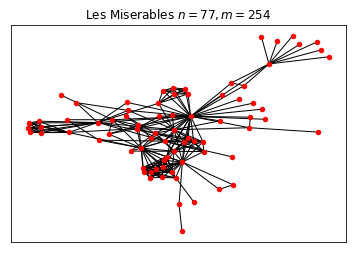

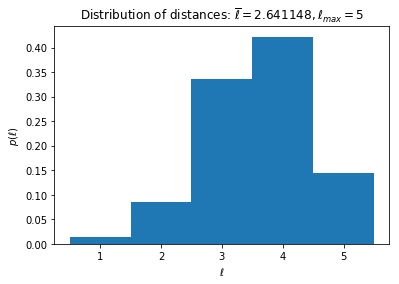

In [117]:
les_miserables()
#random_graph()